In [1]:
import torch.nn as nn
import torch

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.embedding = nn.Linear(1, 50)
        self.linear_1 = nn.Linear(50, 28*28)
        self.linear_2 = nn.Linear(7*7*128, 1)

        self.conv_1 = nn.Conv2d(2, 64, (2, 2), 2)
        self.conv_2 = nn.Conv2d(64, 128, (2, 2), 2)

        self.relu = nn.LeakyReLU(0.2)

        self.drop = nn.Dropout(0.5)

        self.sigmoid = nn.Sigmoid()

    def forward(self, image, label):
        y = self.embedding(label)
        y = self.relu(y)
        y = self.linear_1(y)
        y = self.relu(y)

        y = torch.reshape(y, (-1, 1, 28, 28))

        z = torch.concat((image, y), dim=1)

        z = self.conv_1(z)
        z = self.conv_2(z)

        z = self.relu(z)
        z = torch.reshape(z, (-1, 1, 7*7*128))

        z = self.drop(z)

        z = self.linear_2(z)

        z = self.sigmoid(z)
        
        return z
        

In [2]:
import torch.nn as nn
import torch

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.linear_1 = nn.Linear(100, 7*7*128)
        self.embedding_1 = nn.Linear(1, 50)
        self.linear_2 = nn.Linear(50, 49)

        self.deconv_1 = nn.ConvTranspose2d(129, 64, (2, 2), 2)
        self.deconv_2 = nn.ConvTranspose2d(64, 32, (2, 2), 2)
        self.deconv_3 = nn.Conv2d(32, 1, (1, 1))

        self.relu = nn.LeakyReLU(0.2)

        self.drop = nn.Dropout(0.5)

    def forward(self, noise, label):
        x = self.linear_1(noise)
        x = self.relu(x)
        x = torch.reshape(x, (-1, 128, 7, 7))
        x = self.drop(x)

        y = self.embedding_1(label)
        y = self.relu(y)
        y = self.drop(y)
        y = self.linear_2(y)
        y = torch.reshape(y, (-1, 1, 7, 7))
        y = self.relu(y)
        y = self.drop(y)

        z = torch.concat((x, y), dim=1)

        z = self.deconv_1(z)
        z = self.deconv_2(z)
        z = self.deconv_3(z)

        return z



In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import sys
import matplotlib.pyplot as plt
import torchvision

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device is used: {device}")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

batch_size = 256

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, num_workers=4)

print("Train size:", len(train_dataset))

G_Net = Generator().to(device)
D_Net = Discriminator().to(device)

G_criterion = nn.BCELoss()
G_optimizer = optim.Adam(G_Net.parameters(), lr=0.0002)

D_criterion = nn.BCELoss()
D_optimizer = optim.Adam(D_Net.parameters(), lr=0.0002)

device is used: cuda
Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 3.36MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 128kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 964kB/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Train size: 60000


G loss: 3.25635 | D loss: 0.10422


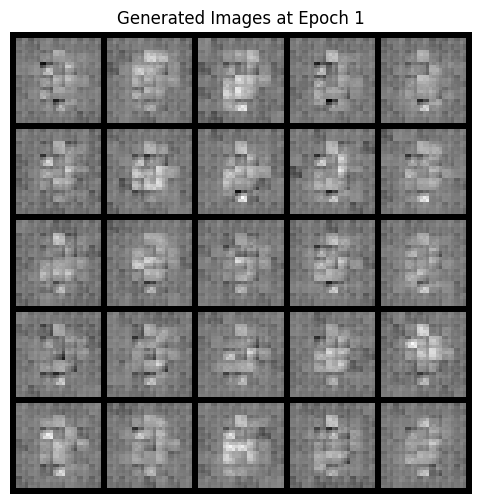

G loss: 3.69209 | D loss: 0.05109
G loss: 3.89108 | D loss: 0.06151
G loss: 3.40444 | D loss: 0.15378
G loss: 4.15709 | D loss: 0.19967
G loss: 3.64937 | D loss: 0.57784
G loss: 7.93778 | D loss: 0.12044
G loss: 1.76764 | D loss: 1.09766
G loss: 2.18186 | D loss: 0.56580
G loss: 1.93166 | D loss: 0.54360
G loss: 4.37345 | D loss: 0.09858


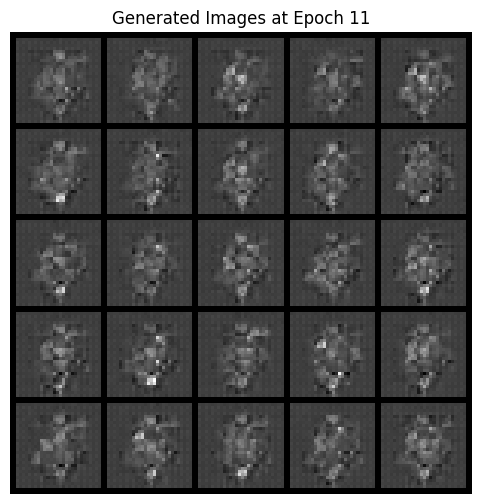

G loss: 1.86324 | D loss: 0.81560
G loss: 3.21563 | D loss: 0.36287
G loss: 2.83473 | D loss: 0.25268
G loss: 3.54729 | D loss: 0.12861
G loss: 2.98241 | D loss: 0.13545
G loss: 2.91488 | D loss: 0.27704
G loss: 1.89666 | D loss: 0.51543
G loss: 2.62648 | D loss: 0.33183
G loss: 2.09219 | D loss: 0.51031
G loss: 1.66302 | D loss: 0.58373


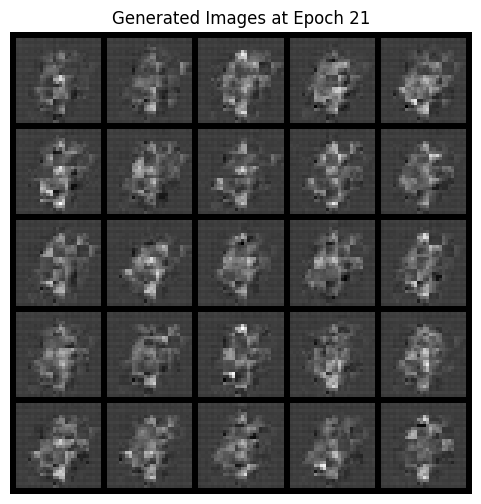

G loss: 2.89802 | D loss: 0.36384
G loss: 2.49178 | D loss: 0.54113
G loss: 4.34820 | D loss: 0.08099
G loss: 2.24942 | D loss: 0.31095
G loss: 4.19929 | D loss: 0.13360
G loss: 3.29762 | D loss: 0.24927
G loss: 2.77519 | D loss: 0.20991
G loss: 3.56085 | D loss: 0.23693
G loss: 2.50126 | D loss: 0.51773
G loss: 2.82585 | D loss: 0.38414


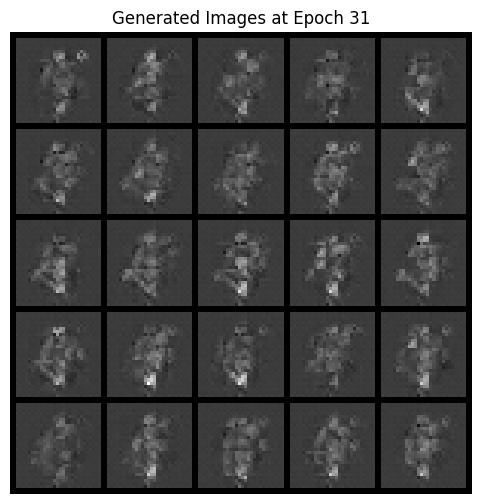

G loss: 3.15958 | D loss: 0.25646
G loss: 3.63385 | D loss: 0.23439
G loss: 4.72151 | D loss: 0.21161
G loss: 3.24546 | D loss: 0.24151
G loss: 2.86740 | D loss: 0.23169
G loss: 3.15453 | D loss: 0.28820
G loss: 3.03097 | D loss: 0.29386
G loss: 4.33794 | D loss: 0.04890
G loss: 4.98460 | D loss: 0.10247
G loss: 3.88362 | D loss: 0.15018


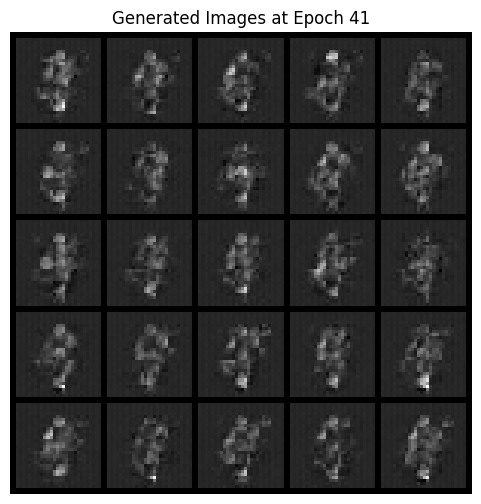

G loss: 3.79679 | D loss: 0.20746
G loss: 4.26097 | D loss: 0.16797
G loss: 4.78692 | D loss: 0.08939
G loss: 4.73315 | D loss: 0.06382
G loss: 4.91351 | D loss: 0.06335
G loss: 4.07786 | D loss: 0.15639
G loss: 5.75644 | D loss: 0.07483
G loss: 4.40856 | D loss: 0.13443
G loss: 3.17430 | D loss: 0.27894
G loss: 4.93759 | D loss: 0.10538


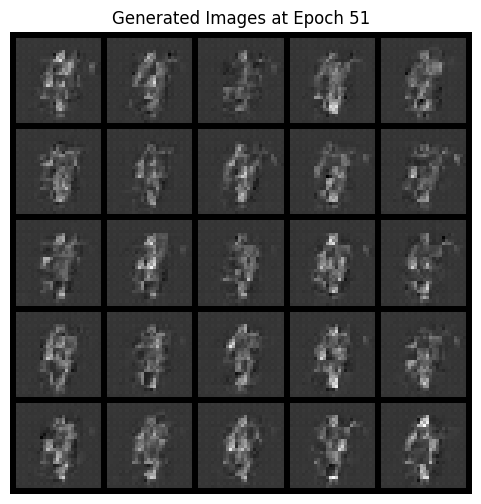

G loss: 4.74611 | D loss: 0.07900
G loss: 4.84803 | D loss: 0.11509
G loss: 5.17781 | D loss: 0.12251
G loss: 5.24747 | D loss: 0.17138
G loss: 4.46827 | D loss: 0.17974
G loss: 5.38744 | D loss: 0.09222
G loss: 5.91765 | D loss: 0.03578
G loss: 4.63831 | D loss: 0.15241
G loss: 5.93793 | D loss: 0.02036
G loss: 4.15632 | D loss: 0.16015


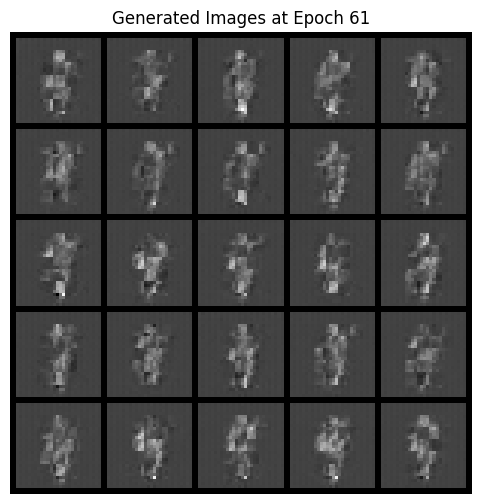

G loss: 6.24136 | D loss: 0.05576
G loss: 5.23912 | D loss: 0.06650
G loss: 4.41906 | D loss: 0.19536
G loss: 6.09342 | D loss: 0.04636
G loss: 5.05463 | D loss: 0.12535
G loss: 5.19579 | D loss: 0.10452
G loss: 5.49924 | D loss: 0.12696
G loss: 3.53770 | D loss: 0.27595
G loss: 5.87239 | D loss: 0.04738
G loss: 5.37764 | D loss: 0.12058


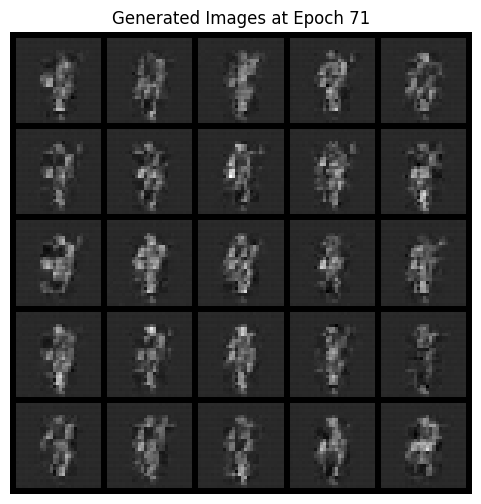

G loss: 6.98099 | D loss: 0.07855
G loss: 4.06045 | D loss: 0.11371
G loss: 6.17335 | D loss: 0.03797
G loss: 4.83116 | D loss: 0.07202
G loss: 6.92234 | D loss: 0.04716
G loss: 5.38590 | D loss: 0.05807
G loss: 4.64304 | D loss: 0.26969
G loss: 6.64834 | D loss: 0.08886
G loss: 5.63168 | D loss: 0.04727
G loss: 4.90270 | D loss: 0.22242


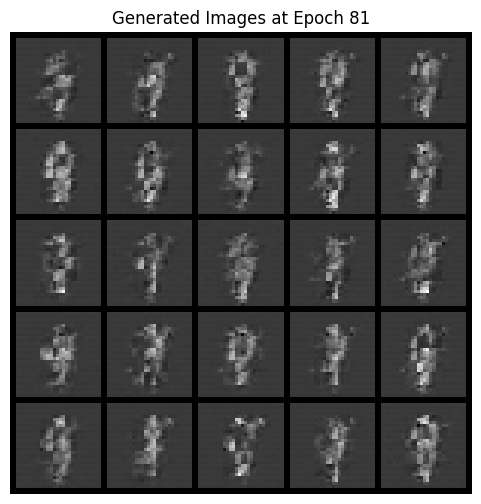

G loss: 6.23606 | D loss: 0.04876
G loss: 6.28373 | D loss: 0.04603
G loss: 5.20372 | D loss: 0.13039
G loss: 4.36395 | D loss: 0.06163
G loss: 5.03731 | D loss: 0.12681
G loss: 5.48849 | D loss: 0.10567
G loss: 6.21941 | D loss: 0.04394
G loss: 5.50251 | D loss: 0.04663
G loss: 4.63760 | D loss: 0.14769
G loss: 5.76444 | D loss: 0.06610


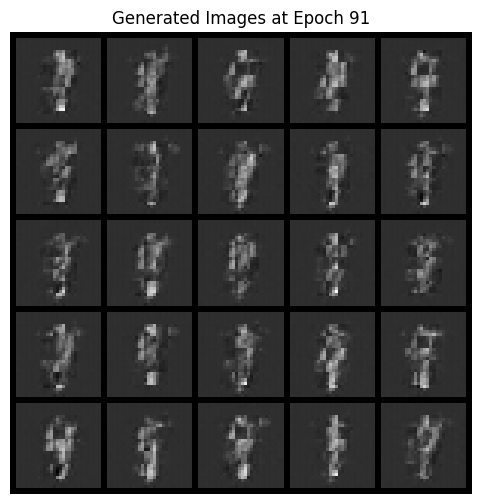

G loss: 4.27510 | D loss: 0.10292
G loss: 5.62864 | D loss: 0.04185
G loss: 4.69355 | D loss: 0.11497
G loss: 6.09647 | D loss: 0.07020
G loss: 4.48410 | D loss: 0.14234
G loss: 6.04805 | D loss: 0.04036
G loss: 5.64288 | D loss: 0.07180
G loss: 4.09218 | D loss: 0.20069
G loss: 6.79014 | D loss: 0.09115


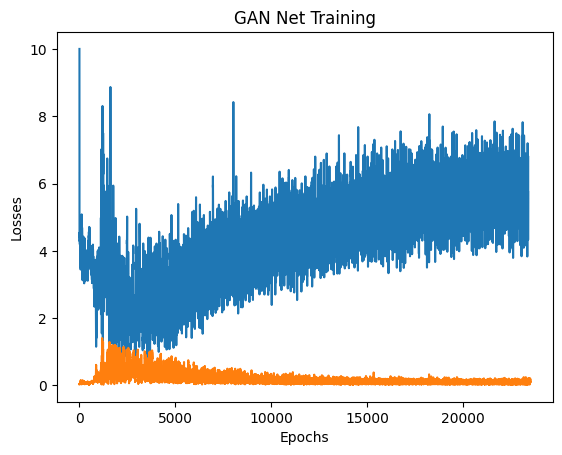

In [21]:
epochs = 100
z_dim = 100
G_losses = [10]
D_losses = []
for epoch in range(epochs):
    for real_images, labels in train_loader:
        results = torch.ones(labels.size(0), 1).to(device)
        # print(labels.size(0))
        real_images = real_images.to(device)
        labels = (labels * 1.0).reshape((-1, 1)).to(device)

        noise = torch.randn(labels.size(0), z_dim).to(device)
        labels.size(0)

        # print(noise.shape, labels.shape)

        fake_images = G_Net(noise, labels)
        G_results = torch.zeros(real_images.size(0), 1).to(device)

        train_images_D = torch.cat((real_images, fake_images))
        train_labels_D = torch.cat((results, G_results))

        indices = torch.randperm(train_images_D.size(0))
        train_images_D = train_images_D[indices]
        train_labels_D = train_labels_D[indices]

        D_Net.train()

        # print(train_images_D.shape)
        labels = torch.cat((labels, labels))

        D_prediction = D_Net(train_images_D, labels)
        D_prediction = torch.squeeze(D_prediction, 1)
        # print(D_prediction.shape)

        D_loss = D_criterion(D_prediction, train_labels_D)

        D_losses.append(D_loss.item())

        D_Net.zero_grad()
        D_loss.backward()
        D_optimizer.step()

        if D_loss.item() < 1:
            D_Net.eval()
            noise = torch.randn(labels.size(0), z_dim).to(device)
            G_labels = torch.ones(labels.size(0), 1).to(device)

            G_outputs = G_Net(noise, labels)
            D_prediction = D_Net(G_outputs, labels)
            D_prediction = torch.squeeze(D_prediction, 1)

            G_loss = G_criterion(D_prediction, G_labels)

            G_losses.append(G_loss.item())

            G_Net.zero_grad()
            G_loss.backward()
            G_optimizer.step()

        sys.stdout.write(f"\rG loss: {G_losses[-1]:.5f} | D loss: {D_losses[-1]:.5f}")

    print()

    if epoch % 10 == 0:
        noise = torch.rand(25, z_dim).to(device)
        labels = torch.randint(0, 10, (25, 1), dtype=torch.float32).to(device)
        with torch.no_grad():
            fake_images = G_Net(noise, labels).view(-1, 1, 28, 28)

        grid = torchvision.utils.make_grid(fake_images, nrow=5, normalize=True)

        plt.figure(figsize=(6, 6))
        plt.imshow(grid.permute(1, 2, 0).cpu())
        plt.axis('off')
        plt.title(f"Generated Images at Epoch {epoch+1}")
        plt.show()

plt.plot(G_losses)
plt.plot(D_losses)

plt.xlabel("Epochs")
plt.ylabel("Losses")

plt.title("GAN Net Training")

plt.show()

Using device: cuda
Epoch [1/100] Batch 469/469 Loss D: 0.3024, Loss G: 2.4357
Epoch [2/100] Batch 469/469 Loss D: 0.1467, Loss G: 2.7666
Epoch [3/100] Batch 469/469 Loss D: 0.1001, Loss G: 2.8999
Epoch [4/100] Batch 469/469 Loss D: 0.4019, Loss G: 6.3812
Epoch [5/100] Batch 469/469 Loss D: 0.1001, Loss G: 3.5123
Epoch [6/100] Batch 469/469 Loss D: 0.1035, Loss G: 3.4665
Epoch [7/100] Batch 469/469 Loss D: 0.0529, Loss G: 3.5160
Epoch [8/100] Batch 469/469 Loss D: 0.0345, Loss G: 3.7710
Epoch [9/100] Batch 469/469 Loss D: 0.1184, Loss G: 3.77480
Epoch [10/100] Batch 469/469 Loss D: 0.0609, Loss G: 3.5381


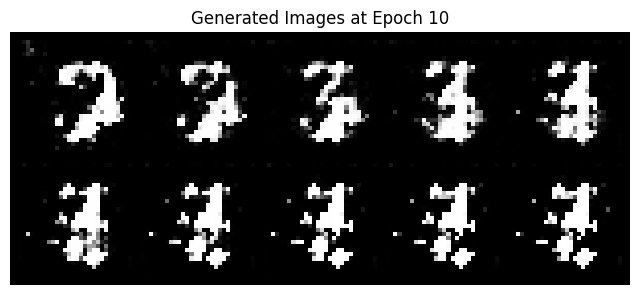

Epoch [11/100] Batch 469/469 Loss D: 0.1263, Loss G: 3.20375
Epoch [12/100] Batch 469/469 Loss D: 1.5095, Loss G: 3.5890
Epoch [13/100] Batch 469/469 Loss D: 0.0845, Loss G: 3.7153
Epoch [14/100] Batch 469/469 Loss D: 0.0546, Loss G: 3.3644
Epoch [15/100] Batch 469/469 Loss D: 0.0893, Loss G: 3.8890
Epoch [16/100] Batch 469/469 Loss D: 0.0518, Loss G: 1.86329
Epoch [17/100] Batch 469/469 Loss D: 0.0374, Loss G: 3.93075
Epoch [18/100] Batch 469/469 Loss D: 0.0537, Loss G: 3.7087
Epoch [19/100] Batch 469/469 Loss D: 0.1199, Loss G: 2.7039
Epoch [20/100] Batch 469/469 Loss D: 0.0345, Loss G: 4.06770


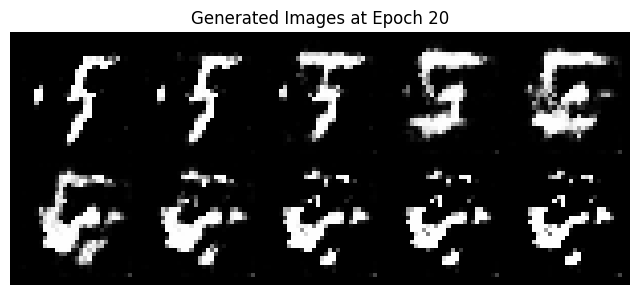

Epoch [21/100] Batch 469/469 Loss D: 0.0913, Loss G: 6.13812
Epoch [22/100] Batch 469/469 Loss D: 0.0510, Loss G: 4.51810
Epoch [23/100] Batch 469/469 Loss D: 0.0642, Loss G: 3.34220
Epoch [24/100] Batch 469/469 Loss D: 0.0373, Loss G: 4.14705
Epoch [25/100] Batch 469/469 Loss D: 0.0201, Loss G: 4.34186
Epoch [26/100] Batch 469/469 Loss D: 0.0812, Loss G: 3.39066
Epoch [27/100] Batch 469/469 Loss D: 0.0360, Loss G: 4.24035
Epoch [28/100] Batch 469/469 Loss D: 0.0606, Loss G: 4.54702
Epoch [29/100] Batch 469/469 Loss D: 0.0307, Loss G: 4.6490
Epoch [30/100] Batch 469/469 Loss D: 0.0674, Loss G: 3.68380


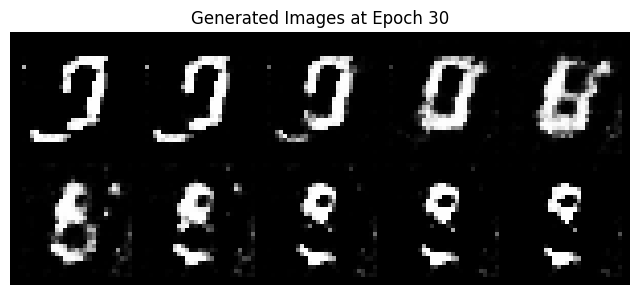

Epoch [31/100] Batch 469/469 Loss D: 0.0166, Loss G: 4.68857
Epoch [32/100] Batch 469/469 Loss D: 0.6271, Loss G: 5.57558
Epoch [33/100] Batch 469/469 Loss D: 0.0636, Loss G: 5.4669
Epoch [34/100] Batch 469/469 Loss D: 0.0365, Loss G: 4.04767
Epoch [35/100] Batch 469/469 Loss D: 0.0166, Loss G: 5.3079
Epoch [36/100] Batch 469/469 Loss D: 0.0489, Loss G: 5.18002
Epoch [37/100] Batch 469/469 Loss D: 0.0399, Loss G: 5.18599
Epoch [38/100] Batch 469/469 Loss D: 0.0243, Loss G: 5.23988
Epoch [39/100] Batch 469/469 Loss D: 0.0456, Loss G: 4.22486
Epoch [40/100] Batch 469/469 Loss D: 0.0153, Loss G: 5.18507


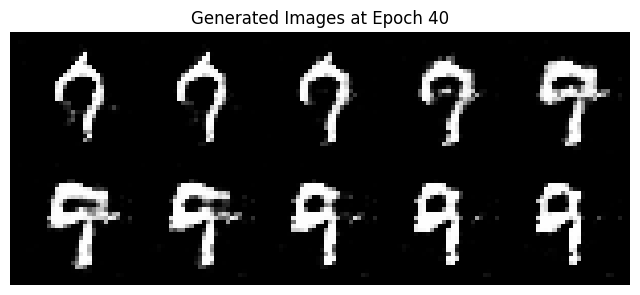

Epoch [41/100] Batch 469/469 Loss D: 0.0074, Loss G: 5.46968
Epoch [42/100] Batch 469/469 Loss D: 0.0103, Loss G: 5.51918
Epoch [43/100] Batch 469/469 Loss D: 0.0038, Loss G: 6.1086
Epoch [44/100] Batch 469/469 Loss D: 0.0215, Loss G: 4.54978
Epoch [45/100] Batch 469/469 Loss D: 0.0190, Loss G: 4.87937
Epoch [46/100] Batch 469/469 Loss D: 0.0121, Loss G: 5.77093
Epoch [47/100] Batch 469/469 Loss D: 0.2380, Loss G: 7.80764
Epoch [48/100] Batch 469/469 Loss D: 0.0192, Loss G: 5.15076
Epoch [49/100] Batch 469/469 Loss D: 0.0090, Loss G: 5.42426
Epoch [50/100] Batch 469/469 Loss D: 0.0151, Loss G: 5.23584


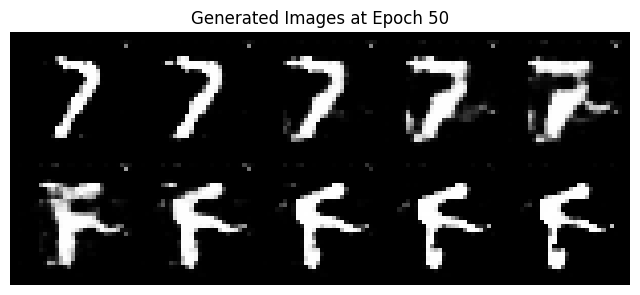

Epoch [51/100] Batch 469/469 Loss D: 0.0123, Loss G: 5.48629
Epoch [52/100] Batch 469/469 Loss D: 0.0207, Loss G: 4.73259
Epoch [53/100] Batch 469/469 Loss D: 0.0201, Loss G: 4.75380
Epoch [54/100] Batch 469/469 Loss D: 0.0312, Loss G: 4.72864
Epoch [55/100] Batch 469/469 Loss D: 0.0041, Loss G: 5.96071
Epoch [56/100] Batch 469/469 Loss D: 0.0407, Loss G: 4.9556
Epoch [57/100] Batch 469/469 Loss D: 0.0328, Loss G: 4.56555
Epoch [58/100] Batch 469/469 Loss D: 0.0253, Loss G: 5.43024
Epoch [59/100] Batch 469/469 Loss D: 0.0173, Loss G: 4.82423
Epoch [60/100] Batch 469/469 Loss D: 0.0088, Loss G: 5.63401


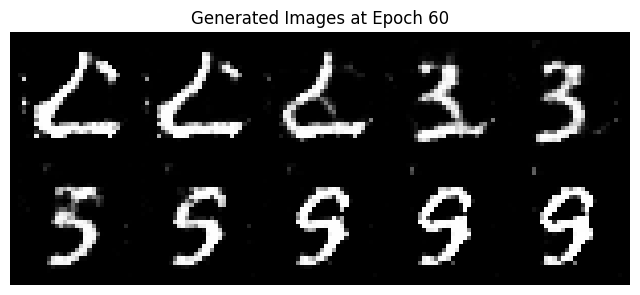

Epoch [61/100] Batch 469/469 Loss D: 0.0155, Loss G: 5.07599
Epoch [62/100] Batch 469/469 Loss D: 0.0144, Loss G: 5.02060
Epoch [63/100] Batch 469/469 Loss D: 0.0348, Loss G: 5.14043
Epoch [64/100] Batch 469/469 Loss D: 0.0263, Loss G: 5.19437
Epoch [65/100] Batch 469/469 Loss D: 0.0195, Loss G: 4.80158
Epoch [66/100] Batch 469/469 Loss D: 0.0287, Loss G: 4.59668
Epoch [67/100] Batch 469/469 Loss D: 0.0147, Loss G: 5.7971
Epoch [68/100] Batch 469/469 Loss D: 0.0556, Loss G: 4.94560
Epoch [69/100] Batch 469/469 Loss D: 0.0083, Loss G: 5.3228
Epoch [70/100] Batch 469/469 Loss D: 0.0467, Loss G: 5.3785


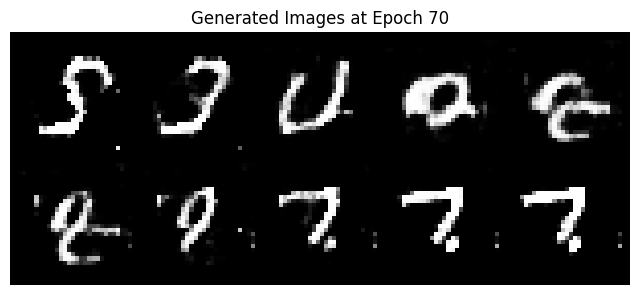

Epoch [71/100] Batch 469/469 Loss D: 0.0450, Loss G: 3.5256
Epoch [72/100] Batch 469/469 Loss D: 0.0280, Loss G: 4.37480
Epoch [73/100] Batch 469/469 Loss D: 0.0928, Loss G: 6.80983
Epoch [74/100] Batch 469/469 Loss D: 0.1261, Loss G: 3.5962
Epoch [75/100] Batch 469/469 Loss D: 0.0693, Loss G: 2.80805
Epoch [76/100] Batch 469/469 Loss D: 0.0644, Loss G: 4.0049
Epoch [77/100] Batch 469/469 Loss D: 0.0257, Loss G: 4.9548
Epoch [78/100] Batch 469/469 Loss D: 0.0373, Loss G: 4.31361
Epoch [79/100] Batch 469/469 Loss D: 0.1391, Loss G: 9.0131
Epoch [80/100] Batch 469/469 Loss D: 0.0638, Loss G: 4.04655


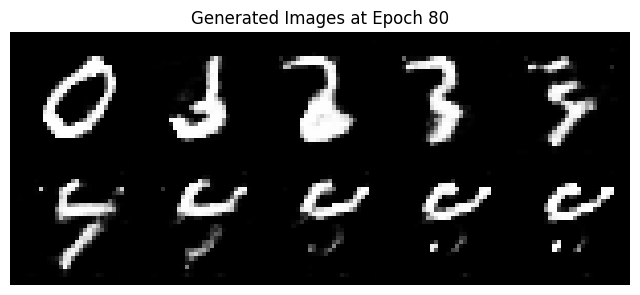

Epoch [81/100] Batch 469/469 Loss D: 0.0827, Loss G: 5.16267
Epoch [82/100] Batch 469/469 Loss D: 0.0548, Loss G: 4.35396
Epoch [83/100] Batch 469/469 Loss D: 0.0542, Loss G: 4.53857
Epoch [84/100] Batch 469/469 Loss D: 0.1988, Loss G: 2.16128
Epoch [85/100] Batch 469/469 Loss D: 0.4250, Loss G: 12.0796
Epoch [86/100] Batch 469/469 Loss D: 0.0181, Loss G: 4.32521
Epoch [87/100] Batch 469/469 Loss D: 0.0837, Loss G: 3.50135
Epoch [88/100] Batch 469/469 Loss D: 0.0253, Loss G: 4.4106
Epoch [89/100] Batch 469/469 Loss D: 0.0749, Loss G: 3.65074
Epoch [90/100] Batch 469/469 Loss D: 0.0419, Loss G: 4.3765


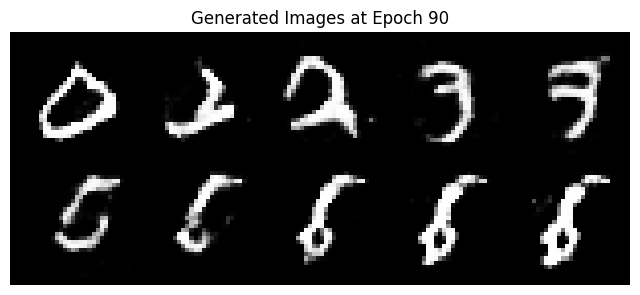

Epoch [91/100] Batch 469/469 Loss D: 0.0563, Loss G: 4.4917
Epoch [92/100] Batch 469/469 Loss D: 0.2189, Loss G: 8.73737
Epoch [93/100] Batch 469/469 Loss D: 0.0182, Loss G: 4.42622
Epoch [94/100] Batch 469/469 Loss D: 0.0667, Loss G: 3.6961
Epoch [95/100] Batch 469/469 Loss D: 0.0346, Loss G: 3.28030
Epoch [96/100] Batch 469/469 Loss D: 0.0453, Loss G: 4.1272
Epoch [97/100] Batch 469/469 Loss D: 0.1008, Loss G: 4.35622
Epoch [98/100] Batch 469/469 Loss D: 0.0276, Loss G: 4.5413
Epoch [99/100] Batch 469/469 Loss D: 0.0256, Loss G: 4.44456
Epoch [100/100] Batch 469/469 Loss D: 0.0883, Loss G: 3.41756


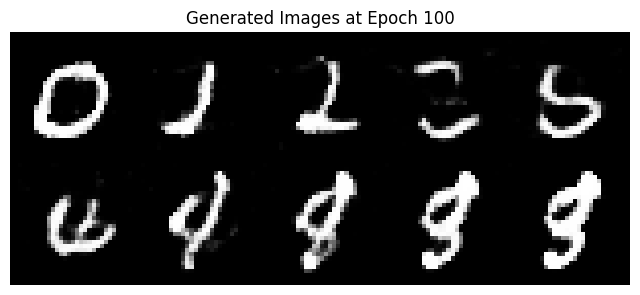

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import sys

# Kiểm tra device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ----------------------------
# Định nghĩa Discriminator
# ----------------------------
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # Nhận đầu vào: ảnh (1,28,28) và nhãn được embed (1,28,28) -> ghép theo chiều channel thành 2 kênh
        self.label_embedding = nn.Linear(1, 28*28)
        self.conv = nn.Sequential(
            nn.Conv2d(2, 64, kernel_size=4, stride=2, padding=1),  # (64, 14, 14)
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # (128, 7, 7)
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.fc = nn.Sequential(
            nn.Linear(128*7*7, 1),
            nn.Sigmoid()
        )
        
    def forward(self, img, labels):
        # labels: shape (batch, 1) -> embed thành vector có kích thước 28*28 rồi reshape
        embedded_labels = self.label_embedding(labels)  # (batch, 28*28)
        embedded_labels = embedded_labels.view(-1, 1, 28, 28)
        # Nối ảnh gốc với nhãn embed theo chiều channel
        d_in = torch.cat((img, embedded_labels), dim=1)  # (batch, 2, 28, 28)
        x = self.conv(d_in)
        x = x.view(x.size(0), -1)
        validity = self.fc(x)
        return validity

# ----------------------------
# Định nghĩa Generator
# ----------------------------
class Generator(nn.Module):
    def __init__(self, noise_dim=100):
        super(Generator, self).__init__()
        self.noise_dim = noise_dim
        # Embed nhãn thành vector có cùng kích thước với noise
        self.label_embedding = nn.Linear(1, noise_dim)
        self.fc = nn.Sequential(
            nn.Linear(noise_dim * 2, 128 * 7 * 7),
            nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (64, 14, 14)
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),     # (1, 28, 28)
            nn.Tanh()  # đầu ra trong khoảng [-1, 1]
        )
        
    def forward(self, noise, labels):
        # Embed nhãn
        label_emb = self.label_embedding(labels)  # (batch, noise_dim)
        # Nối noise và nhãn embed lại với nhau
        x = torch.cat((noise, label_emb), dim=1)  # (batch, noise_dim*2)
        x = self.fc(x)  # (batch, 128*7*7)
        x = x.view(-1, 128, 7, 7)
        img = self.deconv(x)  # (batch, 1, 28, 28)
        return img

# ----------------------------
# Chuẩn bị dữ liệu và siêu tham số
# ----------------------------
batch_size = 128
lr = 0.0002
epochs = 100
noise_dim = 100

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Khởi tạo mô hình
generator = Generator(noise_dim=noise_dim).to(device)
discriminator = Discriminator().to(device)

# Hàm loss và optimizer
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# ----------------------------
# Vòng lặp huấn luyện
# ----------------------------
for epoch in range(1, epochs+1):
    for i, (imgs, labels) in enumerate(train_loader):
        batch_current = imgs.size(0)
        valid = torch.ones(batch_current, 1).to(device)
        fake = torch.zeros(batch_current, 1).to(device)
        
        imgs = imgs.to(device)
        # Chuyển nhãn về dạng float tensor có shape (batch, 1)
        labels = labels.view(-1, 1).float().to(device)
        
        # --------------
        # Huấn luyện Discriminator
        # --------------
        optimizer_D.zero_grad()
        
        # Tính loss cho ảnh thật
        output_real = discriminator(imgs, labels)
        loss_real = adversarial_loss(output_real, valid)
        
        # Sinh ảnh giả
        noise = torch.randn(batch_current, noise_dim).to(device)
        gen_imgs = generator(noise, labels)  # sử dụng nhãn thật cho ảnh giả (conditional)
        
        # Tính loss cho ảnh giả
        output_fake = discriminator(gen_imgs.detach(), labels)
        loss_fake = adversarial_loss(output_fake, fake)
        
        d_loss = (loss_real + loss_fake) / 2
        d_loss.backward()
        optimizer_D.step()
        
        # --------------
        # Huấn luyện Generator
        # --------------
        optimizer_G.zero_grad()
        # Mục tiêu: làm cho discriminator phân loại ảnh giả là ảnh thật
        output = discriminator(gen_imgs, labels)
        g_loss = adversarial_loss(output, valid)
        g_loss.backward()
        optimizer_G.step()
        
        sys.stdout.write(f"\rEpoch [{epoch}/{epochs}] Batch {i+1}/{len(train_loader)} Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")
    sys.stdout.write("\n")
    
    # Sau mỗi 10 epoch, sinh và hiển thị ảnh mẫu
    if epoch % 10 == 0:
        generator.eval()
        with torch.no_grad():
            # Sinh ảnh cho từng nhãn từ 0 đến 9 (10 mẫu)
            n_samples = 10
            noise = torch.randn(n_samples, noise_dim).to(device)
            sample_labels = torch.arange(0, 10).view(-1, 1).float().to(device)
            gen_imgs = generator(noise, sample_labels)
            # Đưa giá trị đầu ra từ [-1, 1] về [0, 1]
            gen_imgs = (gen_imgs + 1) / 2.0
            grid = torchvision.utils.make_grid(gen_imgs, nrow=5)
            plt.figure(figsize=(8, 4))
            plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
            plt.title(f"Generated Images at Epoch {epoch}")
            plt.axis("off")
            plt.show()
        generator.train()
